In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import cumtrapz
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})

Second order differential equations of the form $y'' = f(x,y,y')$ can be solved from 
$$\frac{d}{dx} \begin{pmatrix} y \\ u \end{pmatrix} = \begin{pmatrix} u \\ f(x,y,u) \end{pmatrix}$$

### Evolution of $r$ with respect to $\tau$
$$\ddot{r} = \frac{h^2}{r^3} - \frac{3\mu h^2}{r^4} - \frac{\mu c^2}{r^2}$$
$$\frac{dR}{d\tau} = \frac{d}{d\tau} \begin{pmatrix} r \\ v \end{pmatrix} = \begin{pmatrix} v \\ f(\tau,r,v) \end{pmatrix} $$
### Evolution of $\phi$ with respect to $\tau$
$$\dot{\phi} = \frac{h}{r^2}$$
### Evolution of $t$ with respect to $\tau$
$$\dot{t} = k \left( 1 + \frac{2 \mu}{r} \right)^{-1}$$

In [124]:
M = 1
c = 5
G = 1
μ = G*M/(c**2)
h = 4*μ*c
k = 1

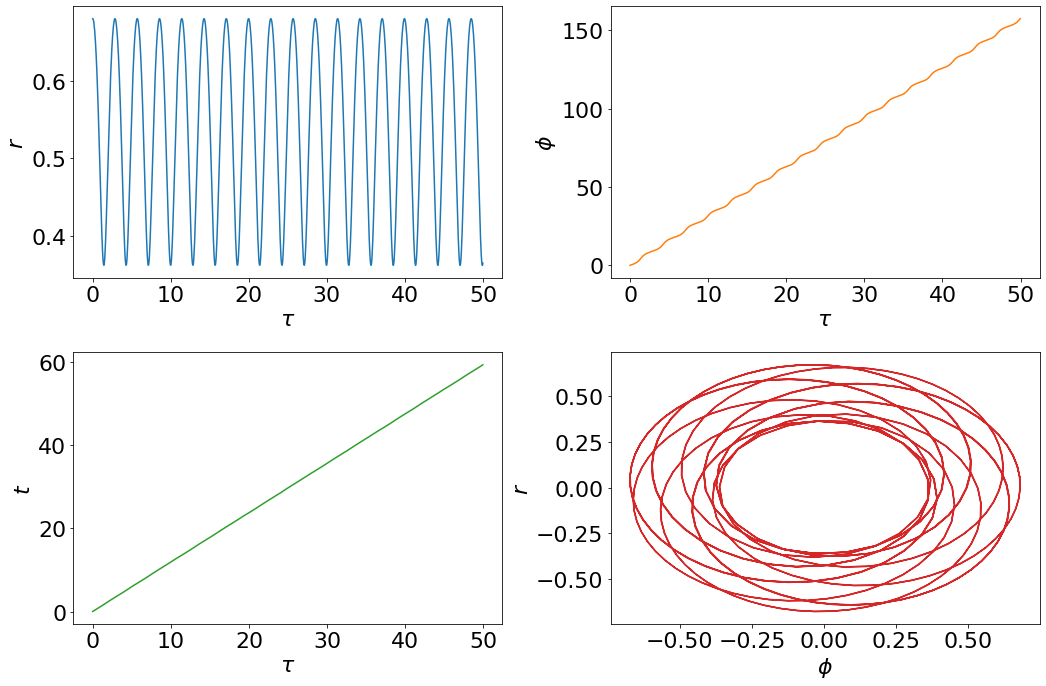

In [127]:
def F(R,τ,h=h,μ=μ,c=c):
    r, v = R
    return [v,h**2 / r**3 - 3*μ * h**2 / r**4 - μ * c**2 / r**2]

r0 = (h/(2*μ*c**2)) * (h + np.sqrt(h**2 - 12 * μ**2 * c**2)) + 0.2
v0 = 0
R0 = (r0,v0)

τ = np.linspace(0,50,1000)
sol = odeint(F,R0,τ)
r = sol.T[0]
ϕ = cumtrapz(h/r**2,τ)
t = cumtrapz(k/(1-2*μ/r),τ)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(τ, r)
axs[0, 0].set_xlabel(r"$\tau$")
axs[0, 0].set_ylabel(r"$r$")
axs[0, 1].plot(τ[0:-1],ϕ, 'tab:orange')
axs[0, 1].set_xlabel(r"$\tau$")
axs[0, 1].set_ylabel(r"$\phi$")
axs[1, 0].plot(τ[0:-1],t, 'tab:green')
axs[1, 0].set_xlabel(r"$\tau$")
axs[1, 0].set_ylabel(r"$t$")
axs[1, 1].plot(r[0:-1]*np.cos(ϕ),r[0:-1]*np.sin(ϕ), 'tab:red')
axs[1, 1].set_xlabel(r"$\phi$")
axs[1, 1].set_ylabel(r"$r$")
fig.tight_layout()
plt.savefig('2_first_orbits.png', format='png')